In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [38]:
#getting connected with the data
import os
import pymysql
import pandas as pd

host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')
user = os.getenv('MYSQL_USER')
password = os.getenv('MYSQL_PASSWORD')
database = os.getenv('MYSQL_DATABASE')

conn = pymysql.connect(
    host='3.6.71.112',
    port=int(3306),
    user="datauser",
    passwd='DBroPrODuser@123',
    db="reciprocidb",
    charset='utf8mb4')


In [39]:
print(conn)

In [ ]:
#SELECT * FROM rp_transaction_item;
###select OID, CREATION_TIME, MODIFIED_TIME, TXN_ID, TXN_DATE,DELIVERY_TYPE, USER_OID, STORE_OID, NO_OF_LINE_ITEMS,BILL_AMOUNT, PAID_AMOUNT, TXN_TYPE, TXN_STATUS, PAYMENT_STATUS, DELIVERY_START_DATETIME, DELIVERY_END_DATETIME from rp_transaction 
###select SKU_CODE, PRODUCT_OID from rp_product_variants;
##select OID, USER_OID from rp_transaction where OMNI_CHANNEL='APP'
##select PRODUCT_OID, PRODUCT_NAME from rp_product_locale where LANGUAGE_OID=1;
##select TXN_OID, PRODUCT_SKU, PRODUCT_QUANTITY, PRODUCT_UNIT_PRICE from rp_transaction_item
###select OID from rp_product
###select OID, FIRST_NAME from rp_user_profile 

In [40]:
### EXTRACTING DATA FROM RP_PRODUCT_VARIANTS

q1 = "select SKU_CODE, PRODUCT_OID from rp_product_variants"
cur = conn.cursor()
rp_product_variants = cur.execute(q1)
rp_product_variants = pd.DataFrame(cur.fetchall())

In [41]:
## NAMING THE COLUMNS
rp_product_variants.columns = ['SKU_CODE','PRODUCT_OID']
rp_product_variants

,SKU_CODE,PRODUCT_OID
0,1242,30
1,3890,102
2,17579,112
3,165,18
4,58,28
...,...,...
409,1164,304
410,1156,306
411,1163,308
412,1170,307


In [42]:
### RENAMINHG THEM 
rp_product_variants.rename(columns = {'SKU_CODE':'PRODUCT_SKU'}, inplace = True)
rp_product_variants

,PRODUCT_SKU,PRODUCT_OID
0,1242,30
1,3890,102
2,17579,112
3,165,18
4,58,28
...,...,...
409,1164,304
410,1156,306
411,1163,308
412,1170,307


In [59]:
## RENAMING COLUMNS
rp_product_variants.rename(columns = {'PRODUCT_OID':'OID'}, inplace = True)

In [43]:
### FETCHING DATA FROM RP_TRANSACTION

q1 = "select OID, USER_OID from rp_transaction where OMNI_CHANNEL='APP'"
cur = conn.cursor()
rp_transaction = cur.execute(q1)
rp_transaction = pd.DataFrame(cur.fetchall())

In [44]:
rp_transaction.columns =['OID','USER_OID']
rp_transaction

,OID,USER_OID
0,1,2
1,2,2
2,3,3
3,4,3
4,5,3
...,...,...
1940,189916,8299
1941,190368,8290
1942,190561,8290
1943,190742,6688


In [45]:
### FETCHING DATA FROM RP_PRODUCT_LOCALE
q1 = "select PRODUCT_OID, PRODUCT_NAME from rp_product_locale where LANGUAGE_OID=1;"
cur = conn.cursor()
rp_product_locale = cur.execute(q1)
rp_product_locale = pd.DataFrame(cur.fetchall())

In [46]:
rp_product_locale.columns = ['PRODUCT_OID','PRODUCT_NAME']
rp_product_locale

,PRODUCT_OID,PRODUCT_NAME
0,38,MILK PISTA COOKIES
1,31,PIZZA BREAD BASE
2,151,RAKHI CAKE CREAM CHOCOLATE (500G
3,45,FRUIT MUFFIN (60G)
4,160,COOKIES GIFT PACK (800G)
...,...,...
288,19,SAUNF RUSK
289,18,RUSK POPPY TOAST
290,17,MILK RUSK
291,16,ELAICHI RUSK


In [63]:
rp_product_locale.rename(columns = {'PRODUCT_OID':'OID'}, inplace = True)

In [47]:
## FETCHING DATA FROM RP_TRANSACTION_ITEM

q1 = "select TXN_OID, PRODUCT_SKU, PRODUCT_QUANTITY, PRODUCT_UNIT_PRICE from rp_transaction_item"
cur = conn.cursor()
rp_trans_item = cur.execute(q1)
rp_trans_item = pd.DataFrame(cur.fetchall())

In [48]:
rp_trans_item.columns = ['TXN_OID','PRODUCT_SKU','PRODUCT_QUANTITY','PRODUCT_UNIT_PRICE']
rp_trans_item

,TXN_OID,PRODUCT_SKU,PRODUCT_QUANTITY,PRODUCT_UNIT_PRICE
0,1,159,4,85.0000
1,2,159,4,85.0000
2,3,159,3,85.0000
3,4,159,1,1.0000
4,5,159,1,1.0000
...,...,...,...,...
458569,190988,761,2,106.6600
458570,190988,23688,2,50.8400
458571,190988,23393,2,37.2800
458572,190988,781,2,142.8600


In [49]:
## FETCHING DATA FROM RP_PRODUCT
q1 = "select OID from rp_product"
cur = conn.cursor()
rp_product = cur.execute(q1)
rp_product = pd.DataFrame(cur.fetchall())

In [50]:
rp_product.columns = ['OID']
rp_product

,OID
0,16
1,17
2,18
3,19
4,20
...,...
288,304
289,305
290,306
291,307


In [51]:
q1 = "select OID, FIRST_NAME from rp_user_profile"
cur = conn.cursor()
rp_user_profile = cur.execute(q1)
rp_user_profile = pd.DataFrame(cur.fetchall())

In [52]:
rp_user_profile.columns = ['OID','FIRST_NAME']
rp_user_profile

,OID,FIRST_NAME
0,1,Admin
1,2,Puja
2,3,TechTreeTheBest
3,4,Shabistan
4,5,Biplove
...,...,...
8015,8352,Utkarsh
8016,8353,Gurpreet
8017,8354,Utkarsh
8018,8355,Love


In [53]:
###SELECT * FROM rp_transaction_statement;
q="select OID, CREATION_TIME, TXN_ID, TXN_DATE,DELIVERY_TYPE, USER_OID,STORE_OID, NO_OF_LINE_ITEMS,BILL_AMOUNT, PAID_AMOUNT, TXN_TYPE, TXN_STATUS,PAYMENT_STATUS from rp_transaction where TXN_TYPE in ('PURCHASE') and TXN_STATUS not in ('CANCELLED')"

cur = conn.cursor()
rp_trans = cur.execute(q)
rp_trans = pd.DataFrame(cur.fetchall())

In [26]:
### displaying the dataset

In [54]:
rp_trans

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,2020-05-27 21:40:08,1590615608210,2020-05-27 21:40:08,DELIVERY,2,1,1,340.0000,None,PURCHASE,ORDER_INITIATED,None
1,2,2020-05-27 21:47:12,1590616031740,2020-05-27 21:47:12,DELIVERY,2,1,1,340.0000,None,PURCHASE,ORDER_INITIATED,None
2,3,2020-05-28 07:42:07,1590651727090,2020-05-28 07:42:07,DELIVERY,3,1,1,255.0000,None,PURCHASE,ORDER_INITIATED,None
3,4,2020-05-28 09:30:34,1590658234173,2020-05-28 09:30:34,DELIVERY,3,1,1,1.0000,None,PURCHASE,ORDER_INITIATED,None
4,5,2020-05-28 09:35:09,1590658509091,2020-05-28 09:35:09,DELIVERY,3,1,1,1.0000,None,PURCHASE,ORDER_INITIATED,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189826,190983,2020-11-01 22:50:12,IN1604251178957ARTI,2020-11-01 22:50:12,PICKUP,-1,93,2,257.0000,257.0000,PURCHASE,COMPLETED,None
189827,190984,2020-11-01 22:54:38,IN1604250760518ARTI,2020-11-01 22:54:38,PICKUP,-1,93,3,445.0000,445.0000,PURCHASE,COMPLETED,None
189828,190986,2020-11-01 23:13:39,IN1604252603308ARTI,2020-11-01 23:13:39,PICKUP,-1,93,4,1020.0000,1020.0000,PURCHASE,COMPLETED,None
189829,190987,2020-11-01 23:25:05,CH1604253239278HPATHAK,2020-11-01 23:25:05,PICKUP,-1,92,2,685.0000,685.0000,PURCHASE,COMPLETED,None


In [ ]:
## NAMING COLUMNS OF THE TABLE

In [55]:
rp_trans.columns=['OID', 'CREATION_TIME', 'TXN_ID', 'TXN_DATE','DELIVERY_TYPE', 'USER_OID','STORE_OID', 'NO_OF_LINE_ITEMS','BILL_AMOUNT', 'PAID_AMOUNT', 'TXN_TYPE', 'TXN_STATUS','PAYMENT_STATUS']
rp_trans

,OID,CREATION_TIME,TXN_ID,TXN_DATE,DELIVERY_TYPE,USER_OID,STORE_OID,NO_OF_LINE_ITEMS,BILL_AMOUNT,PAID_AMOUNT,TXN_TYPE,TXN_STATUS,PAYMENT_STATUS
0,1,2020-05-27 21:40:08,1590615608210,2020-05-27 21:40:08,DELIVERY,2,1,1,340.0000,None,PURCHASE,ORDER_INITIATED,None
1,2,2020-05-27 21:47:12,1590616031740,2020-05-27 21:47:12,DELIVERY,2,1,1,340.0000,None,PURCHASE,ORDER_INITIATED,None
2,3,2020-05-28 07:42:07,1590651727090,2020-05-28 07:42:07,DELIVERY,3,1,1,255.0000,None,PURCHASE,ORDER_INITIATED,None
3,4,2020-05-28 09:30:34,1590658234173,2020-05-28 09:30:34,DELIVERY,3,1,1,1.0000,None,PURCHASE,ORDER_INITIATED,None
4,5,2020-05-28 09:35:09,1590658509091,2020-05-28 09:35:09,DELIVERY,3,1,1,1.0000,None,PURCHASE,ORDER_INITIATED,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189826,190983,2020-11-01 22:50:12,IN1604251178957ARTI,2020-11-01 22:50:12,PICKUP,-1,93,2,257.0000,257.0000,PURCHASE,COMPLETED,None
189827,190984,2020-11-01 22:54:38,IN1604250760518ARTI,2020-11-01 22:54:38,PICKUP,-1,93,3,445.0000,445.0000,PURCHASE,COMPLETED,None
189828,190986,2020-11-01 23:13:39,IN1604252603308ARTI,2020-11-01 23:13:39,PICKUP,-1,93,4,1020.0000,1020.0000,PURCHASE,COMPLETED,None
189829,190987,2020-11-01 23:25:05,CH1604253239278HPATHAK,2020-11-01 23:25:05,PICKUP,-1,92,2,685.0000,685.0000,PURCHASE,COMPLETED,None


In [80]:
rp_trans.rename(columns={'OID':'TO'}, inplace=True)

In [ ]:
## CHECKING THE PRESENCE OF NULL VALUES IN COLUMNS OF RP_TRANS TABLE




In [30]:
na_values = pd.isna(rp_trans) # Boolean DataFrame
na_features = na_values.any() # Boolean Series
print(na_features)

TO                  False
CREATION_TIME       False
TXN_ID              False
TXN_DATE            False
DELIVERY_TYPE       False
USER_OID            False
STORE_OID           False
NO_OF_LINE_ITEMS    False
BILL_AMOUNT         False
PAID_AMOUNT          True
TXN_TYPE            False
TXN_STATUS          False
PAYMENT_STATUS       True
dtype: bool


In [56]:
### merging RP_PRODUCT_VARIANTS AND RP_TRANS_ITEM TABLE
a1 = pd.merge(rp_product_variants, rp_trans_item, on='PRODUCT_SKU')

In [57]:
a1

,PRODUCT_SKU,PRODUCT_OID,TXN_OID,PRODUCT_QUANTITY,PRODUCT_UNIT_PRICE
0,1242,30,304,2,45.0000
1,1242,30,355,1,45.0000
2,1242,30,382,2,45.0000
3,1242,30,383,2,45.0000
4,1242,30,384,2,45.0000
...,...,...,...,...,...
335711,19526,277,189453,1,42.8600
335712,19526,277,189488,1,42.8600
335713,19526,277,189681,1,42.8600
335714,19526,277,189799,1,42.8600


In [60]:
## MERGING RP_PRODUCT AND RP_PRODUCT_VARIANTS
a2 = pd.merge(rp_product, rp_product_variants,on='OID')
a2

,OID,PRODUCT_SKU
0,16,159
1,17,164
2,18,165
3,19,166
4,20,169
...,...,...
409,304,1164
410,305,1168
411,306,1156
412,307,1170


In [61]:
### MERGING A1 AND A2
a1_a2 = pd.merge(a1, a2, on = 'PRODUCT_SKU')
a1_a2

,PRODUCT_SKU,PRODUCT_OID,TXN_OID,PRODUCT_QUANTITY,PRODUCT_UNIT_PRICE,OID
0,1242,30,304,2,45.0000,30
1,1242,30,355,1,45.0000,30
2,1242,30,382,2,45.0000,30
3,1242,30,383,2,45.0000,30
4,1242,30,384,2,45.0000,30
...,...,...,...,...,...,...
335711,19526,277,189453,1,42.8600,277
335712,19526,277,189488,1,42.8600,277
335713,19526,277,189681,1,42.8600,277
335714,19526,277,189799,1,42.8600,277


In [64]:
## MERGING RP_PRODUCT_LOCALE AND RP_PRODUCT
a3=pd.merge(rp_product_locale,rp_product, on='OID')
a3

,OID,PRODUCT_NAME
0,38,MILK PISTA COOKIES
1,31,PIZZA BREAD BASE
2,151,RAKHI CAKE CREAM CHOCOLATE (500G
3,45,FRUIT MUFFIN (60G)
4,160,COOKIES GIFT PACK (800G)
...,...,...
288,19,SAUNF RUSK
289,18,RUSK POPPY TOAST
290,17,MILK RUSK
291,16,ELAICHI RUSK


In [65]:
## MERGING A1_A2 WITH A3
a1_a2_a3 = pd.merge(a1_a2, a3, on='OID')

In [66]:
a1_a2_a3

,PRODUCT_SKU,PRODUCT_OID,TXN_OID,PRODUCT_QUANTITY,PRODUCT_UNIT_PRICE,OID,PRODUCT_NAME
0,1242,30,304,2,45.0000,30,BUN TIL BURGER (4PC)
1,1242,30,355,1,45.0000,30,BUN TIL BURGER (4PC)
2,1242,30,382,2,45.0000,30,BUN TIL BURGER (4PC)
3,1242,30,383,2,45.0000,30,BUN TIL BURGER (4PC)
4,1242,30,384,2,45.0000,30,BUN TIL BURGER (4PC)
...,...,...,...,...,...,...,...
335711,19526,277,189453,1,42.8600,277,ELACHI RUSK (250G)
335712,19526,277,189488,1,42.8600,277,ELACHI RUSK (250G)
335713,19526,277,189681,1,42.8600,277,ELACHI RUSK (250G)
335714,19526,277,189799,1,42.8600,277,ELACHI RUSK (250G)


In [82]:
a1_a2_a3.rename(columns={'TXN_OID':'TO'}, inplace=True)

In [67]:
rp_trans_item.rename(columns = {'TXN_OID':'OID'}, inplace = True)


rp_user_profile.rename(columns = {'OID':'USER_OID'}, inplace = True)


In [68]:
## MERGING RP_TRANSACTION AND RP_TRANS_ITEM
a4= pd.merge(rp_transaction, rp_trans_item,on='OID')
a4

,OID,USER_OID,PRODUCT_SKU,PRODUCT_QUANTITY,PRODUCT_UNIT_PRICE
0,1,2,159,4,85.0000
1,2,2,159,4,85.0000
2,3,3,159,3,85.0000
3,4,3,159,1,1.0000
4,5,3,159,1,1.0000
...,...,...,...,...,...
4725,190561,8290,685,4,55.0000
4726,190561,8290,863,2,40.0000
4727,190561,8290,762,1,71.0000
4728,190742,6688,466,1,1200.0000


In [69]:
## MERGING RP_USER_PROFILE AND RP_TRANSACTION
a5 = pd.merge(rp_user_profile, rp_transaction, on = 'USER_OID')
a5

,USER_OID,FIRST_NAME,OID
0,2,Puja,1
1,2,Puja,2
2,2,Puja,16
3,2,Puja,21
4,2,Puja,22
...,...,...,...
1940,8290,Siddhartha,189058
1941,8290,Siddhartha,189137
1942,8290,Siddhartha,190368
1943,8290,Siddhartha,190561


In [75]:
## MERGING A4 AND A5
a4_a5 = pd.merge(a4, a5, on=['USER_OID','OID'])

In [76]:
a4_a5

,OID,USER_OID,PRODUCT_SKU,PRODUCT_QUANTITY,PRODUCT_UNIT_PRICE,FIRST_NAME
0,1,2,159,4,85.0000,Puja
1,2,2,159,4,85.0000,Puja
2,3,3,159,3,85.0000,TechTreeTheBest
3,4,3,159,1,1.0000,TechTreeTheBest
4,5,3,159,1,1.0000,TechTreeTheBest
...,...,...,...,...,...,...
4725,190561,8290,685,4,55.0000,Siddhartha
4726,190561,8290,863,2,40.0000,Siddhartha
4727,190561,8290,762,1,71.0000,Siddhartha
4728,190742,6688,466,1,1200.0000,N


In [78]:
a4_a5.rename(columns={'OID':'TO'}, inplace=True)

In [83]:
## MERGING ALL TOGETHER
a1_a2_a3_a4_a5 = pd.merge(a1_a2_a3, a4_a5, on=['TO','PRODUCT_SKU','PRODUCT_QUANTITY','PRODUCT_UNIT_PRICE'])

In [84]:
a1_a2_a3_a4_a5

,PRODUCT_SKU,PRODUCT_OID,TO,PRODUCT_QUANTITY,PRODUCT_UNIT_PRICE,OID,PRODUCT_NAME,USER_OID,FIRST_NAME
0,1242,30,304,2,45.0000,30,BUN TIL BURGER (4PC),278,dhruv
1,1242,30,355,1,45.0000,30,BUN TIL BURGER (4PC),499,arun
2,1242,30,382,2,45.0000,30,BUN TIL BURGER (4PC),517,Binni
3,1242,30,383,2,45.0000,30,BUN TIL BURGER (4PC),517,Binni
4,1242,30,384,2,45.0000,30,BUN TIL BURGER (4PC),517,Binni
...,...,...,...,...,...,...,...,...,...
4707,22775,272,180662,1,575.0000,272,CHOCOLATE CAKE (500G),7176,madiha
4708,22775,272,180663,1,575.0000,272,CHOCOLATE CAKE (500G),7176,madiha
4709,22775,272,180668,1,575.0000,272,CHOCOLATE CAKE (500G),7176,madiha
4710,22774,272,182202,1,600.0000,272,CHOCOLATE CAKE (500G),7649,Vikesh


In [85]:
## MERGING A1_A2_A3_A4_A5 WITH RP_TRANS00
data = pd.merge(a1_a2_a3_a4_a5, rp_trans, on=['TO','USER_OID'])
data

,PRODUCT_SKU,PRODUCT_OID,TO,PRODUCT_QUANTITY,PRODUCT_UNIT_PRICE,OID,PRODUCT_NAME,USER_OID,FIRST_NAME,CREATION_TIME,TXN_ID,TXN_DATE,DELIVERY_TYPE,STORE_OID,NO_OF_LINE_ITEMS,BILL_AMOUNT,PAID_AMOUNT,TXN_TYPE,TXN_STATUS,PAYMENT_STATUS
0,1242,30,304,2,45.0000,30,BUN TIL BURGER (4PC),278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
1,165,18,304,1,75.0000,18,RUSK POPPY TOAST,278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
2,1240,31,304,2,35.0000,31,PIZZA BREAD BASE,278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
3,50,27,304,2,60.0000,27,MULTIGRAIN BREAD,278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
4,166,19,304,1,85.0000,19,SAUNF RUSK,278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,22945,287,182852,1,675.0000,287,RED VELVET CAKE (500G),8048,Shreya,2020-10-28 18:13:24,1603889003864,2020-10-28 18:13:24,DELIVERY,93,1,675.0000,675.0000,PURCHASE,ORDER_INITIATED,None
4701,22775,272,180662,1,575.0000,272,CHOCOLATE CAKE (500G),7176,madiha,2020-10-27 15:04:27,1603791266989,2020-10-27 15:04:27,DELIVERY,93,1,575.0000,575.0000,PURCHASE,ORDER_INITIATED,None
4702,22775,272,180663,1,575.0000,272,CHOCOLATE CAKE (500G),7176,madiha,2020-10-27 15:05:27,1603791327400,2020-10-27 15:05:27,DELIVERY,93,1,575.0000,575.0000,PURCHASE,ORDER_INITIATED,None
4703,22775,272,180668,1,575.0000,272,CHOCOLATE CAKE (500G),7176,madiha,2020-10-27 15:07:10,1603791429518,2020-10-27 15:07:10,DELIVERY,93,1,575.0000,575.0000,PURCHASE,ORDER_PICKED,None


In [86]:
data.rename(columns={'TO':'TXN_OID'}, inplace=True)

In [87]:
data

,PRODUCT_SKU,PRODUCT_OID,TXN_OID,PRODUCT_QUANTITY,PRODUCT_UNIT_PRICE,OID,PRODUCT_NAME,USER_OID,FIRST_NAME,CREATION_TIME,TXN_ID,TXN_DATE,DELIVERY_TYPE,STORE_OID,NO_OF_LINE_ITEMS,BILL_AMOUNT,PAID_AMOUNT,TXN_TYPE,TXN_STATUS,PAYMENT_STATUS
0,1242,30,304,2,45.0000,30,BUN TIL BURGER (4PC),278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
1,165,18,304,1,75.0000,18,RUSK POPPY TOAST,278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
2,1240,31,304,2,35.0000,31,PIZZA BREAD BASE,278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
3,50,27,304,2,60.0000,27,MULTIGRAIN BREAD,278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
4,166,19,304,1,85.0000,19,SAUNF RUSK,278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,22945,287,182852,1,675.0000,287,RED VELVET CAKE (500G),8048,Shreya,2020-10-28 18:13:24,1603889003864,2020-10-28 18:13:24,DELIVERY,93,1,675.0000,675.0000,PURCHASE,ORDER_INITIATED,None
4701,22775,272,180662,1,575.0000,272,CHOCOLATE CAKE (500G),7176,madiha,2020-10-27 15:04:27,1603791266989,2020-10-27 15:04:27,DELIVERY,93,1,575.0000,575.0000,PURCHASE,ORDER_INITIATED,None
4702,22775,272,180663,1,575.0000,272,CHOCOLATE CAKE (500G),7176,madiha,2020-10-27 15:05:27,1603791327400,2020-10-27 15:05:27,DELIVERY,93,1,575.0000,575.0000,PURCHASE,ORDER_INITIATED,None
4703,22775,272,180668,1,575.0000,272,CHOCOLATE CAKE (500G),7176,madiha,2020-10-27 15:07:10,1603791429518,2020-10-27 15:07:10,DELIVERY,93,1,575.0000,575.0000,PURCHASE,ORDER_PICKED,None


In [71]:
na_values = pd.isna(data) # Boolean DataFrame
na_features = na_values.any() # Boolean Series
print(na_features)

PRODUCT_SKU           False
PRODUCT_OID           False
TXN_OID               False
PRODUCT_QUANTITY      False
PRODUCT_UNIT_PRICE    False
OID                   False
PRODUCT_NAME          False
USER_OID              False
FIRST_NAME             True
CREATION_TIME         False
TXN_ID                False
TXN_DATE              False
DELIVERY_TYPE         False
STORE_OID             False
NO_OF_LINE_ITEMS      False
BILL_AMOUNT           False
PAID_AMOUNT            True
TXN_TYPE              False
TXN_STATUS            False
PAYMENT_STATUS         True
dtype: bool


In [72]:
print(sum(na_values['PAYMENT_STATUS']))

4549


In [73]:
data

,PRODUCT_SKU,PRODUCT_OID,TXN_OID,PRODUCT_QUANTITY,PRODUCT_UNIT_PRICE,OID,PRODUCT_NAME,USER_OID,FIRST_NAME,CREATION_TIME,TXN_ID,TXN_DATE,DELIVERY_TYPE,STORE_OID,NO_OF_LINE_ITEMS,BILL_AMOUNT,PAID_AMOUNT,TXN_TYPE,TXN_STATUS,PAYMENT_STATUS
0,1242,30,304,2,45.0000,30,BUN TIL BURGER (4PC),278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
1,165,18,304,1,75.0000,18,RUSK POPPY TOAST,278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
2,1240,31,304,2,35.0000,31,PIZZA BREAD BASE,278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
3,50,27,304,2,60.0000,27,MULTIGRAIN BREAD,278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
4,166,19,304,1,85.0000,19,SAUNF RUSK,278,dhruv,2020-07-10 11:35:16,1594361116161,2020-07-10 11:35:16,DELIVERY,1,6,510.8000,510.8000,PURCHASE,COMPLETED,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4625,22945,287,182852,1,675.0000,287,RED VELVET CAKE (500G),8048,Shreya,2020-10-28 18:13:24,1603889003864,2020-10-28 18:13:24,DELIVERY,93,1,675.0000,675.0000,PURCHASE,ORDER_INITIATED,None
4626,22775,272,180662,1,575.0000,272,CHOCOLATE CAKE (500G),7176,madiha,2020-10-27 15:04:27,1603791266989,2020-10-27 15:04:27,DELIVERY,93,1,575.0000,575.0000,PURCHASE,ORDER_INITIATED,None
4627,22775,272,180663,1,575.0000,272,CHOCOLATE CAKE (500G),7176,madiha,2020-10-27 15:05:27,1603791327400,2020-10-27 15:05:27,DELIVERY,93,1,575.0000,575.0000,PURCHASE,ORDER_INITIATED,None
4628,22775,272,180668,1,575.0000,272,CHOCOLATE CAKE (500G),7176,madiha,2020-10-27 15:07:10,1603791429518,2020-10-27 15:07:10,DELIVERY,93,1,575.0000,575.0000,PURCHASE,ORDER_PICKED,None


In [74]:
## TAKING COUNT OF PRODUCT_NAMES
data.PRODUCT_NAME.value_counts()


ELAICHI RUSK                      378
BROWN BREAD                       132
MILK BREAD (300G)                 111
FRUIT BREAD (300G)                102
VEGGIE CHEESE BURGER               93
                                 ... 
WHEAT BREAD  (300 G)                1
RED VELVET CAKE  (500G)             1
BAKLAWA GIFT PACK (500G)            1
JUMBO BIG BREAD  (6PCS)             1
CHOCOLATE BOX SPECIAL (18 PCS)      1
Name: PRODUCT_NAME, Length: 225, dtype: int64

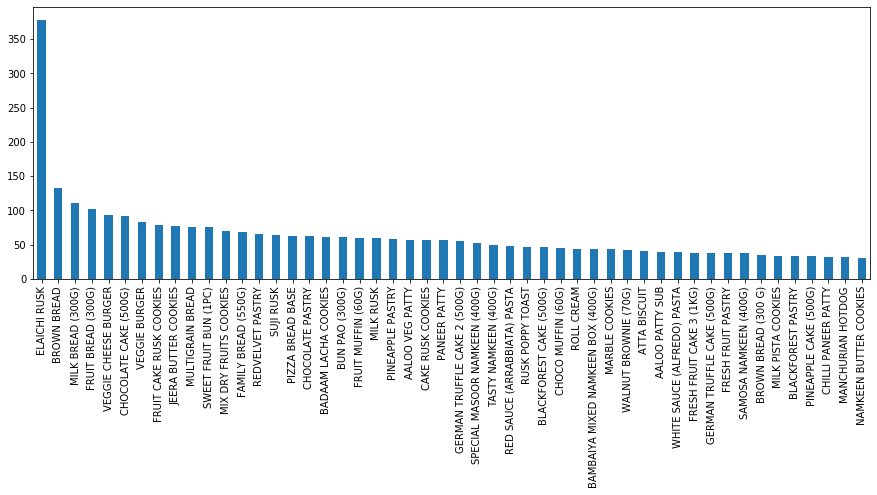

In [98]:
# Plot 50 largest categories of transactions.
data.PRODUCT_NAME.value_counts()[:50].plot(kind='bar', figsize=(15,5))

In [88]:
## THE DESIRED DATAFRAME
dt = a1_a2_a3_a4_a5[['PRODUCT_NAME','PRODUCT_QUANTITY','PRODUCT_UNIT_PRICE','PRODUCT_OID','USER_OID','TO']]

In [89]:
dt

,PRODUCT_NAME,PRODUCT_QUANTITY,PRODUCT_UNIT_PRICE,PRODUCT_OID,USER_OID,TO
0,BUN TIL BURGER (4PC),2,45.0000,30,278,304
1,BUN TIL BURGER (4PC),1,45.0000,30,499,355
2,BUN TIL BURGER (4PC),2,45.0000,30,517,382
3,BUN TIL BURGER (4PC),2,45.0000,30,517,383
4,BUN TIL BURGER (4PC),2,45.0000,30,517,384
...,...,...,...,...,...,...
4707,CHOCOLATE CAKE (500G),1,575.0000,272,7176,180662
4708,CHOCOLATE CAKE (500G),1,575.0000,272,7176,180663
4709,CHOCOLATE CAKE (500G),1,575.0000,272,7176,180668
4710,CHOCOLATE CAKE (500G),1,600.0000,272,7649,182202


# MARKET BASKET ANALYSIS

In [77]:
dt

,PRODUCT_NAME,PRODUCT_QUANTITY,PRODUCT_UNIT_PRICE,PRODUCT_OID,USER_OID,TO
0,BUN TIL BURGER (4PC),2,45.0000,30,278,304
1,BUN TIL BURGER (4PC),1,45.0000,30,499,355
2,BUN TIL BURGER (4PC),2,45.0000,30,517,382
3,BUN TIL BURGER (4PC),2,45.0000,30,517,383
4,BUN TIL BURGER (4PC),2,45.0000,30,517,384
...,...,...,...,...,...,...
4632,CHOCOLATE CAKE (500G),1,575.0000,272,7176,180662
4633,CHOCOLATE CAKE (500G),1,575.0000,272,7176,180663
4634,CHOCOLATE CAKE (500G),1,575.0000,272,7176,180668
4635,CHOCOLATE CAKE (500G),1,600.0000,272,7649,182202


In [90]:
## REMOVING THE ROWS WITH PRODUCT_QUANTITY LESS THAN 0
dt = dt[dt.PRODUCT_QUANTITY >0]
dt


,PRODUCT_NAME,PRODUCT_QUANTITY,PRODUCT_UNIT_PRICE,PRODUCT_OID,USER_OID,TO
0,BUN TIL BURGER (4PC),2,45.0000,30,278,304
1,BUN TIL BURGER (4PC),1,45.0000,30,499,355
2,BUN TIL BURGER (4PC),2,45.0000,30,517,382
3,BUN TIL BURGER (4PC),2,45.0000,30,517,383
4,BUN TIL BURGER (4PC),2,45.0000,30,517,384
...,...,...,...,...,...,...
4707,CHOCOLATE CAKE (500G),1,575.0000,272,7176,180662
4708,CHOCOLATE CAKE (500G),1,575.0000,272,7176,180663
4709,CHOCOLATE CAKE (500G),1,575.0000,272,7176,180668
4710,CHOCOLATE CAKE (500G),1,600.0000,272,7649,182202


In [91]:
dt.rename(columns={'TO':'TXN_OID'}, inplace=True)

### EXPLAINATION OF THE FEATURES

Association rules analysis is a technique to uncover how items are associated to each other. There are three common ways to measure association.

Measure 1: Support. This says how popular an itemset is, it is number of times appear in total number of transaction. in other word we say frequency of item.

Measure 2: Confidence. This says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}. This is measured by the proportion of transactions with item X, in which item Y also appears.

Measure 3: Lift. it is ratio of expected confidance to observed confidance. it is described as confidance of Y when item X was already known(x/y) to the confidance of Y when X item is unknown. in other words confidance of Y w.r.t. x and confiadnce of Y without X (means both are independent to each other).

support = occurance of item / total no of transaction.

confidance = support ( X Union Y) / support(X).

lift = support (X Union Y)/ support(X) * support(Y) .




Association rules are normally written like this: {Diapers} -> {Beer} which means that there is a strong relationship between customers that purchased diapers and also purchased beer in the same transaction.

In the above example, the {Diaper} is the antecedent and the {Beer} is the consequent. Both antecedents and consequents can have multiple items. In other words, {Diaper, Gum} -> {Beer, Chips} is a valid rule.

Support is the relative frequency that the rules show up. In many instances, you may want to look for high support in order to make sure it is a useful relationship. However, there may be instances where a low support is useful if you are trying to find “hidden” relationships.

Confidence is a measure of the reliability of the rule. A confidence of .5 in the above example would mean that in 50% of the cases where Diaper and Gum were purchased, the purchase also included Beer and Chips. For product recommendation, a 50% confidence may be perfectly acceptable but in a medical situation, this level may not be high enough.

Lift is the ratio of the observed support to that expected if the two rules were independent. The basic rule of thumb is that a lift value close to 1 means the rules were completely independent. Lift values > 1 are generally more “interesting” and could be indicative of a useful rule pattern.

In [92]:
#convert data in format which it require converting using pivot table and Quantity sum as values. fill 0 if any nan values

basket = (dt.groupby(['TXN_OID', 'PRODUCT_NAME'])['PRODUCT_QUANTITY']
          .sum().unstack().reset_index().fillna(0)
          .set_index('TXN_OID'))

##basket = pd.pivot_table(data=dt,index='TXN_OID',columns='PRODUCT_NAME',values='PRODUCT_QUANTITY', \
  ##                      aggfunc='sum',fill_value=0)

In [93]:
basket

PRODUCT_NAME,(MB) BROWN GIFT PACK 40,(MB) BROWN GIFT PACK 6,(MB) BROWN GIFT PACK 7,AALOO PATTY SUB,AALOO VEG PATTY,AJWAIN JALEBI COOKIES,AMUL BUTTER (100G),ATTA BISCUIT,AUSTRALIAN ALMOND COOKIES,BADAAM (ALMOND) CHOCO (1 PCS),...,WAFER CRUST GUJIA (250G),WALNUT BROWNIE (70G),WALNUT CREAMLESS CAKE (300GM),WHEAT BREAD (300 G),WHEAT BREAD (300G),WHEAT RUSK,WHEAT RUSK (250G),WHITE SAUCE (ALFREDO) PASTA,WHITEFOREST CAKE (500G),WHOLE WHEAT BREAD (300G)
TXN_OID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
190561,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
# we dont need quantity sum we need either has taken or not so if user has taken that item mark as 1 else he has not taken 0.

def convert_into_binary(x):
    if x > 0:
        return 1
    else:
        return 0

basket_sets = basket.applymap(convert_into_binary)



In [95]:
basket_sets['KAJU SALTED (250G)']

TXN_OID
1         0
2         0
3         0
4         0
5         0
         ..
189916    0
190368    0
190561    0
190742    0
190829    0
Name: KAJU SALTED (250G), Length: 1936, dtype: int64

In [123]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp37-none-any.whl size=5979 sha256=b80e72ce0730c990c5fb6aef8f189512bf1ddd10309ddf7a390ee2bca2aad92c
  Stored in directory: C:\Users\pc\AppData\Local\pip\Cache\wheels\5d\92\bb\474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori
Note: you may need to restart the kernel to use updated packages.


In [86]:
pip install mlxtend --user

Note: you may need to restart the kernel to use updated packages.


In [96]:
from apyori import apriori
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [97]:
#call apriori function and pass minimum support here we are passing 1%. means 1 times in total number of transaction that item was present.
frequent_itemsets = apriori(basket_sets, min_support=0.01, use_colnames=True)

In [98]:
#it will generate frequent itemsets using two step approch
frequent_itemsets

,support,itemsets
0,0.020661,(AALOO PATTY SUB)
1,0.029442,(AALOO VEG PATTY)
2,0.014979,(AJWAIN JALEBI COOKIES)
3,0.021178,(ATTA BISCUIT)
4,0.031508,(BADAAM LACHA COOKIES)
...,...,...
182,0.012397,"(FRUIT MUFFIN (60G), ELAICHI RUSK, POWER SEEDS..."
183,0.012397,"(FRUIT MUFFIN (60G), ELAICHI RUSK, CAKE RUSK C..."
184,0.017562,"(TASTY NAMKEEN (400G), SPECIAL MASOOR NAMKEEN ..."
185,0.017562,"(TASTY NAMKEEN (400G), SPECIAL MASOOR NAMKEEN ..."


In [ ]:
'''
The leverage metric

    Leverage provides a sanity check.
        support(antecedent, consequent) = joint support in data.
        support(antecedent) * support(consequent) = expected joint support for unrelated antecedent and consequent.

    Leverage formula
        leverage(antecendent, consequent) = support(antecedent, consequent) - support(antecedent) * support(consequent)
        

'''
   
    

In [99]:
# we have association rules which need to put on frequent itemset. here we are setting based on lift and has minimum lift as 1
rules_mlxtend = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules_mlxtend.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(BADAAM LACHA COOKIES),(ELAICHI RUSK),0.031508,0.196798,0.019112,0.606557,3.082139,0.012911,2.041473
1,(ELAICHI RUSK),(BADAAM LACHA COOKIES),0.196798,0.031508,0.019112,0.097113,3.082139,0.012911,1.072661
2,(BADAAM LACHA COOKIES),(MULTIGRAIN BREAD),0.031508,0.041839,0.019112,0.606557,14.497470,0.017793,2.435326
3,(MULTIGRAIN BREAD),(BADAAM LACHA COOKIES),0.041839,0.031508,0.019112,0.456790,14.497470,0.017793,1.782905
4,(SPECIAL MASOOR NAMKEEN (400G)),(BADAAM LACHA COOKIES),0.026860,0.031508,0.018079,0.673077,21.361917,0.017232,2.962445


In [100]:
# rules_mlxtend.rename(columns={'antecedents':'lhs','consequents':'rhs'})

# as based business use case we can sort based on confidance and lift.
rules_mlxtend[ (rules_mlxtend['lift'] >= 4) & (rules_mlxtend['confidence'] >= 0.8) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
19,(POWER SEEDS COOKIES),(BROWN BREAD),0.014463,0.069215,0.012913,0.892857,12.899787,0.011912,8.687328
27,(POWER SEEDS COOKIES),(CAKE RUSK COOKIES),0.014463,0.028926,0.012397,0.857143,29.632653,0.011978,6.797521
36,(POWER SEEDS COOKIES),(ELAICHI RUSK),0.014463,0.196798,0.012397,0.857143,4.355456,0.009550,5.622417
49,(POWER SEEDS COOKIES),(FRUIT MUFFIN (60G)),0.014463,0.031508,0.012397,0.857143,27.203747,0.011941,6.779442
51,(POWER SEEDS COOKIES),(MIX DRY FRUITS COOKIES),0.014463,0.036674,0.012913,0.892857,24.346076,0.012383,8.991047
...,...,...,...,...,...,...,...,...,...
1200,"(CAKE RUSK COOKIES, MIX DRY FRUITS COOKIES)","(POWER SEEDS COOKIES, FRUIT MUFFIN (60G), BROW...",0.012397,0.012397,0.012397,1.000000,80.666667,0.012243,inf
1201,"(BROWN BREAD, POWER SEEDS COOKIES)","(CAKE RUSK COOKIES, FRUIT MUFFIN (60G), MIX DR...",0.012913,0.012397,0.012397,0.960000,77.440000,0.012237,24.690083
1202,"(MIX DRY FRUITS COOKIES, POWER SEEDS COOKIES)","(CAKE RUSK COOKIES, FRUIT MUFFIN (60G), BROWN ...",0.012913,0.012397,0.012397,0.960000,77.440000,0.012237,24.690083
1203,"(MIX DRY FRUITS COOKIES, BROWN BREAD)","(CAKE RUSK COOKIES, FRUIT MUFFIN (60G), POWER ...",0.014463,0.012397,0.012397,0.857143,69.142857,0.012217,6.913223


In [101]:
rules_mlxtend['lhs items'] = rules_mlxtend['antecedents'].apply(lambda x:len(x) )
rules_mlxtend[rules_mlxtend['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
915,"(CAKE RUSK COOKIES, FRUIT MUFFIN (60G), BROWN ...","(POWER SEEDS COOKIES, ELAICHI RUSK)",0.012397,0.012397,0.012397,1.0,80.666667,0.012243,inf,3
1044,"(FRUIT MUFFIN (60G), MIX DRY FRUITS COOKIES)","(CAKE RUSK COOKIES, POWER SEEDS COOKIES, ELAIC...",0.012397,0.012397,0.012397,1.0,80.666667,0.012243,inf,2
1049,"(CAKE RUSK COOKIES, MIX DRY FRUITS COOKIES)","(POWER SEEDS COOKIES, FRUIT MUFFIN (60G), ELAI...",0.012397,0.012397,0.012397,1.0,80.666667,0.012243,inf,2
1048,"(CAKE RUSK COOKIES, POWER SEEDS COOKIES)","(FRUIT MUFFIN (60G), MIX DRY FRUITS COOKIES, E...",0.012397,0.012397,0.012397,1.0,80.666667,0.012243,inf,2
921,"(FRUIT MUFFIN (60G), ELAICHI RUSK)","(CAKE RUSK COOKIES, BROWN BREAD, POWER SEEDS C...",0.012397,0.012397,0.012397,1.0,80.666667,0.012243,inf,2


AttributeError: module 'matplotlib' has no attribute 'show'

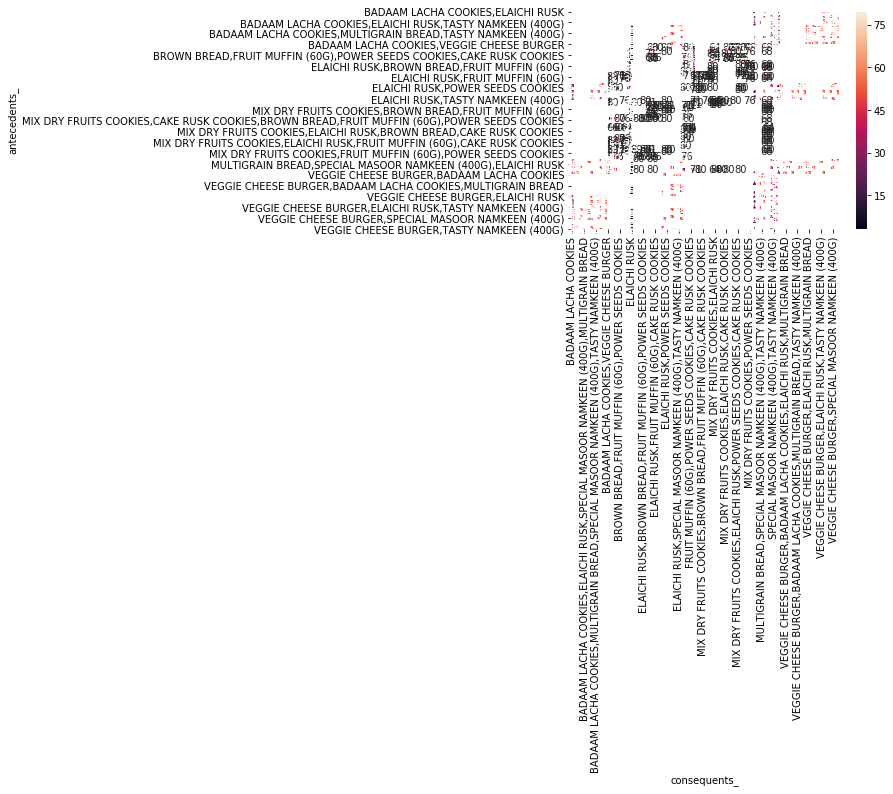

In [99]:
# Import seaborn under its standard alias
import seaborn as sns
# Replace frozen sets with strings
rules_mlxtend['antecedents_'] = rules_mlxtend['antecedents'].apply(lambda a: ','.join(list(a)))
rules_mlxtend['consequents_'] = rules_mlxtend['consequents'].apply(lambda a: ','.join(list(a)))
    # Transform the DataFrame of rules into a matrix using the lift metric
pivot = rules_mlxtend[rules_mlxtend['lhs items']>1].pivot(index = 'antecedents_', 
                        columns = 'consequents_', values= 'lift')
    # Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot, annot = True)

plt.show()

## One-hot encode the transaction data

    One-hot encoding data.
        TransactionEncoder() instantiates an encoder object.
        .fit() creates mapping between list and one-hot encoding.
        .transform() transforms list into one-hot encoded array.

    Applying one-hot encoding will transform the list of lists (of transactions) into a DataFrame.
        The columns correspond to item categories and the rows correspond to transactions. A true indicates that a transaction contains an item from the corresponding category.
    One-hot encoding simplifies the computation of metrics.
        We will also use a one-hot encoded DataFrame as an input to different mlxtend functions

In [106]:
# Recover transaction itemsets from orders DataFrame.
transactions = dt.groupby("TXN_OID").PRODUCT_NAME.unique()

# Print transactions header.
print(transactions.head())

# Convert the pandas series to list of lists.
transactions = transactions.tolist()

TXN_OID
1    [ELAICHI RUSK]
2    [ELAICHI RUSK]
3    [ELAICHI RUSK]
4    [ELAICHI RUSK]
5    [ELAICHI RUSK]
Name: PRODUCT_NAME, dtype: object


In [107]:


from mlxtend.preprocessing import TransactionEncoder

# Instantiate an encoder.
encoder = TransactionEncoder()

# Fit encoder to list of lists.
encoder.fit(transactions)

# Transform lists into one-hot encoded array.
onehot = encoder.transform(transactions)

# Convert array to pandas DataFrame.
onehot = pd.DataFrame(onehot, columns = encoder.columns_)



In [109]:
onehot.tail(10)

,(MB) BROWN GIFT PACK 40,(MB) BROWN GIFT PACK 6,(MB) BROWN GIFT PACK 7,AALOO PATTY SUB,AALOO VEG PATTY,AJWAIN JALEBI COOKIES,AMUL BUTTER (100G),ATTA BISCUIT,AUSTRALIAN ALMOND COOKIES,BADAAM (ALMOND) CHOCO (1 PCS),...,WAFER CRUST GUJIA (250G),WALNUT BROWNIE (70G),WALNUT CREAMLESS CAKE (300GM),WHEAT BREAD (300 G),WHEAT BREAD (300G),WHEAT RUSK,WHEAT RUSK (250G),WHITE SAUCE (ALFREDO) PASTA,WHITEFOREST CAKE (500G),WHOLE WHEAT BREAD (300G)
1926,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1927,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1928,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1929,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1930,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1931,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1932,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1933,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1934,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1935,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [110]:

##Compute the support metric

  ##  Support measures the frequency with which an itemset appears in a database of transactions.

##support(X) = {number of transactions containing X}/{total number of transactions}

  ##  .mean(axis=0) computes support values for one-hot encoded DataFrame.
   ## A high support value indicates that items in an itemset are purchased together frequently and, thus, are associated with each other.


# Print support metric over all rows for each column.
onehot.mean(axis=0)



(MB) BROWN GIFT PACK 40        0.000517
(MB) BROWN GIFT PACK 6         0.002066
(MB) BROWN GIFT PACK 7         0.002066
AALOO PATTY SUB                0.020661
AALOO VEG PATTY                0.029442
                                 ...   
WHEAT RUSK                     0.011880
WHEAT RUSK  (250G)             0.000517
WHITE SAUCE (ALFREDO) PASTA    0.020145
WHITEFOREST CAKE  (500G)       0.000517
WHOLE WHEAT BREAD (300G)       0.015496
Length: 227, dtype: float64

In [111]:

##Compute the item count distribution over transactions

##    onehot.sum(axis=1) sums across the columns in a DataFrame.

# Print distribution of item counts.
onehot.sum(axis=1).value_counts()



1     946
2     290
3     264
4     141
5     125
6      90
7      42
9      17
8      10
10      6
16      2
12      2
11      1
dtype: int64

In [125]:
# Add POWER SEEDS COOKIES and ELAICHI RUSK to DataFrame.
onehot['RELATION'] = onehot['POWER SEEDS COOKIES'] & onehot['ELAICHI RUSK']

# Print support value.
onehot['RELATION'].mean(axis = 0)

0.012396694214876033

In [124]:

##Compute the confidence metric

  ##  The support metric doesn't provide information about direction.
    ##    support(antecedent, consequent) = support(consequent, antecedent)

    ##The confidence metric has a direction.
      ##  Conditional probability of the consequent, given the antecedent.

##confidence(antecedent (rightarrow) consequent)= support(antecedent, consequent/{support(antecedent)}

  ##  A high value of confidence indicates that the antecedent and consequent are associated and that the direction of the association runs from the antecedent to the consequent.
# Compute joint support for sports_leisure and health_beauty.
joint_support = (onehot['POWER SEEDS COOKIES'] & onehot['ELAICHI RUSK']).mean()

# Print confidence metric for POWER SEEDS COOKIES -> ELAICHI RUSK.
print(joint_support / onehot['POWER SEEDS COOKIES'].mean())


# Print confidence for ELAICHI RUSK -> POWER SEEDS COOKIES.
print(joint_support / onehot['ELAICHI RUSK'].mean())



0.8571428571428571
0.06299212598425197


In [ ]:
###CONFIDENCE(POWER SEEDS COOKIES -> ELAICHI RUSK) > CONFIDENCE( ELAICHI RUSK --> POWER SEEDS COOKIES )

##Since the two have the same joint support, the confidence measures will differ only by the antecedent support.
##The higher confidence metric means that the antecedent has lower support.